In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("archive\premier-league-matches.csv")
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [2]:
data.Away.unique()

array(['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn',
       'Norwich City', 'Aston Villa', 'Sheffield Weds', 'Tottenham',
       'Oldham Athletic', 'Liverpool', 'QPR', 'Arsenal', 'Ipswich Town',
       'Coventry City', 'Sheffield Utd', 'Leeds United', 'Crystal Palace',
       'Manchester City', 'Chelsea', 'Southampton', 'Everton',
       "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
       'Leicester City', 'Bolton', 'Derby County', 'Sunderland',
       'Barnsley', 'Charlton Ath', 'Bradford City', 'Watford', 'Fulham',
       'West Brom', 'Birmingham City', 'Wolves', 'Portsmouth',
       'Wigan Athletic', 'Reading', 'Stoke City', 'Hull City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Bournemouth',
       'Huddersfield', 'Brighton', 'Brentford'], dtype=object)

In [3]:
columns_to_keep = ['Home','Away', 'FTR']
data = data[columns_to_keep]

In [4]:
data["FTR"].unique()

array(['H', 'D', 'A'], dtype=object)

In [5]:
data.isnull().sum()

Home    0
Away    0
FTR     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Home    12026 non-null  object
 1   Away    12026 non-null  object
 2   FTR     12026 non-null  object
dtypes: object(3)
memory usage: 282.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

home = LabelEncoder()
data['Home'] = home.fit_transform(data['Home'])
data['Home'].unique()

array([15, 23, 36, 16,  0, 22, 18, 38, 14, 31, 26,  4, 48, 43, 25,  1, 32,
       28, 30, 34, 27, 37, 29, 46, 42, 24,  6, 40, 17,  2, 13, 44,  8, 19,
        3, 45, 33, 49, 47, 35, 21, 39, 11,  5, 41, 12,  7, 10, 20,  9])

In [8]:
Away = LabelEncoder()
data['Away'] = Away.fit_transform(data['Away'])
data['Away'].unique()

array([28, 48, 27,  4, 30,  1, 37, 43, 32, 25, 34,  0, 22, 15, 36, 23, 16,
       26, 14, 38, 18, 31, 42, 46, 29, 24,  6, 17, 40,  2, 13,  8, 44, 19,
       45,  3, 49, 33, 47, 35, 39, 21, 11,  5, 41, 12,  7, 20, 10,  9])

In [9]:
ftr = LabelEncoder()
data['FTR'] = ftr.fit_transform(data['FTR'])
data['FTR'].unique()

array([2, 1, 0])

In [10]:
unique_encoded_values = data['FTR'].unique()
original_categorical_values = ftr.inverse_transform(unique_encoded_values)
print(original_categorical_values)

['H' 'D' 'A']


In [11]:
data.head()

,Home,Away,FTR
0,15,28,2
1,23,48,2
2,36,27,2
3,16,4,1
4,0,30,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import numpy as np

X = data.drop('FTR', axis=1)
y = data['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.4613466334164589


Accuracy: 0.4534497090606816


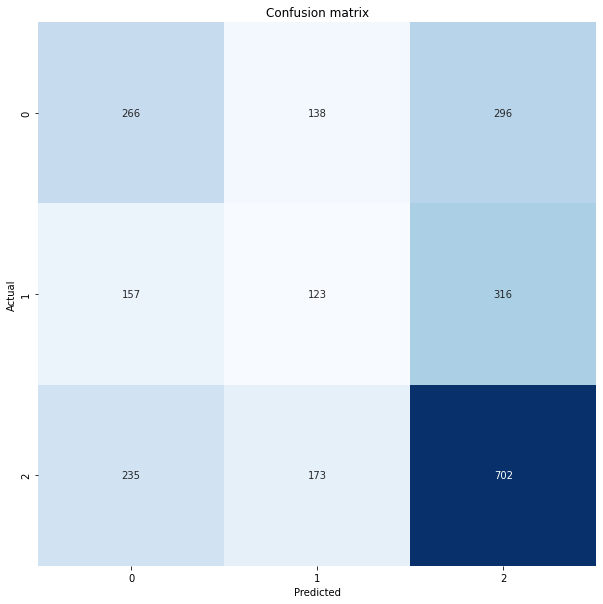

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42,n_estimators = 100)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()


Accuracy: 0.512884455527847


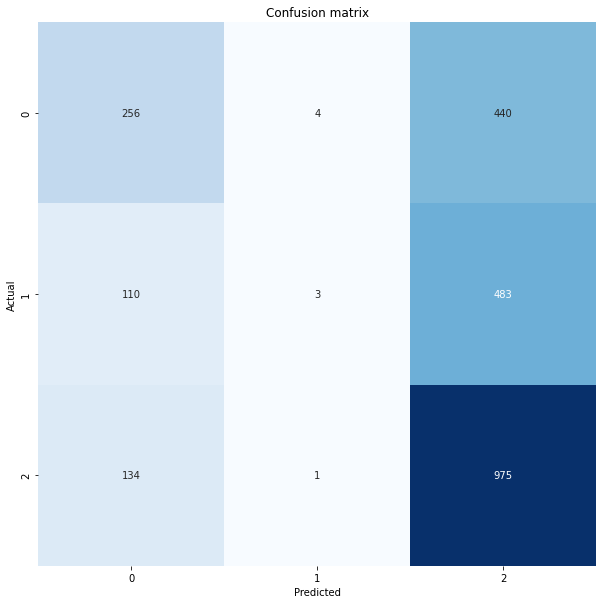

In [15]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42,learning_rate = 0.1, max_depth= 3, n_estimators= 100)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()


Accuracy: 0.4613466334164589


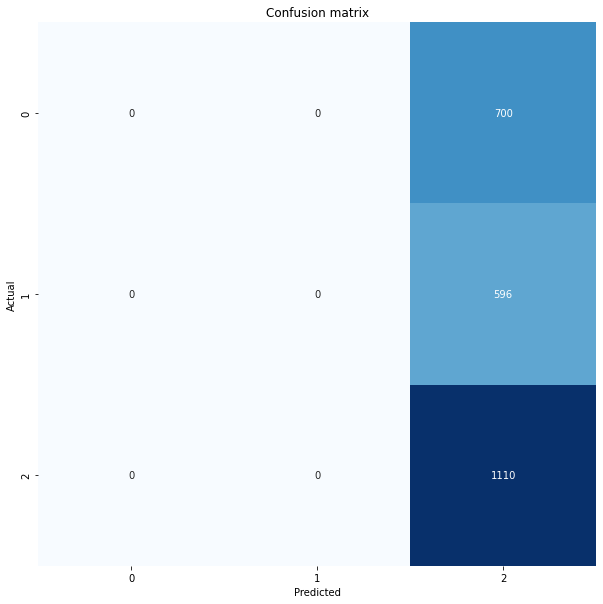

In [16]:
#SVM
from sklearn.svm import SVC
svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()


In [17]:
X

,Home,Away
0,15,28
1,23,48
2,36,27
3,16,4
4,0,30
...,...,...
12021,18,7
12022,24,46
12023,1,10
12024,23,43


In [18]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100,50,200,150],
    'max_depth': [None,1,3,2]
}

xgb_model = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}
Best Model Accuracy: 0.513715710723192


In [19]:
data.head()

,Home,Away,FTR
0,15,28,2
1,23,48,2
2,36,27,2
3,16,4,1
4,0,30,0


In [20]:
X = np.array([['Aston Villa','Leeds United']])
X


array([['Aston Villa', 'Leeds United']], dtype='<U12')

In [21]:
X[:, 0] = home.transform(X[:,0])
X[:, 1] = Away.transform(X[:,1])

X = X.astype(float)

In [22]:
y_pred = best_model.predict(X)
y_pred

array([2], dtype=int64)

In [23]:
y_pred_encoded = best_model.predict(X)

# Inverse transform the label-encoded predictions to get categorical values
y_pred_categorical = ftr.inverse_transform(y_pred_encoded)
y_pred_categorical

predicted_team = y_pred_categorical[0]

print(predicted_team)

H


In [24]:
import pickle
data = {"model": best_model, "home":home , "Away": Away}
with open('football_saved.pkl', 'wb') as file:
    pickle.dump(data, file)

In [25]:
with open('football_saved.pkl', 'rb') as file:
    data = pickle.load(file)

best_model_model = data["model"]
home = data["home"]
Away = data["Away"]

In [26]:
y_pred = best_model_model.predict(X)
y_pred

array([2], dtype=int64)

In [27]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

NameError: name 'WC_Grounds_History' is not defined